In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('../data/OxCGRT_Brazil_latest.csv', low_memory=False)

df.head(-4)

,CountryName,CountryCode,RegionName,RegionCode,CityName,CityCode,Jurisdiction,Date,C1_School closing,C1_Flag,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Brazil,BRA,NaN,NaN,NaN,NaN,NAT_GOV,20200101,0.0,NaN,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
1,Brazil,BRA,NaN,NaN,NaN,NaN,NAT_GOV,20200102,0.0,NaN,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
2,Brazil,BRA,NaN,NaN,NaN,NaN,NAT_GOV,20200103,0.0,NaN,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
3,Brazil,BRA,NaN,NaN,NaN,NaN,NAT_GOV,20200104,0.0,NaN,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
4,Brazil,BRA,NaN,NaN,NaN,NaN,NAT_GOV,20200105,0.0,NaN,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201136,Brazil,BRA,Tocantins,BR_TO,Palmas,BR_1721000,CITY_WIDE,20220323,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201137,Brazil,BRA,Tocantins,BR_TO,Palmas,BR_1721000,CITY_WIDE,20220324,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201138,Brazil,BRA,Tocantins,BR_TO,Palmas,BR_1721000,CITY_WIDE,20220325,NaN,NaN,...,NaN,40.74,NaN,50.0,NaN,39.58,NaN,45.24,NaN,0.0
201139,Brazil,BRA,Tocantins,BR_TO,Palmas,BR_1721000,CITY_WIDE,20220326,NaN,NaN,...,NaN,40.74,NaN,50.0,NaN,39.58,NaN,45.24,NaN,0.0


In [3]:
df.columns

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode', 'CityName',
       'CityCode', 'Jurisdiction', 'Date', 'C1_School closing', 'C1_Flag',
       'C1_Notes', 'C2_Workplace closing', 'C2_Flag', 'C2_Notes',
       'C3_Cancel public events', 'C3_Flag', 'C3_Notes',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C4_Notes',
       'C5_Close public transport', 'C5_Flag', 'C5_Notes',
       'C6_Stay at home requirements', 'C6_Flag', 'C6_Notes',
       'C7_Restrictions on internal movement', 'C7_Flag', 'C7_Notes',
       'C8_International travel controls', 'C8_Notes', 'E1_Income support',
       'E1_Flag', 'E1_Notes', 'E2_Debt/contract relief', 'E2_Notes',
       'E3_Fiscal measures', 'E3_Notes', 'E4_International support',
       'E4_Notes', 'H1_Public information campaigns', 'H1_Flag', 'H1_Notes',
       'H2_Testing policy', 'H2_Notes', 'H3_Contact tracing', 'H3_Notes',
       'H4_Emergency investment in healthcare', 'H4_Notes',
       'H5_Investment in vaccines', 'H5_Notes'

In [4]:
a = df.isna().any()

a.values

array([False, False,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

### Relações
- Comparar número de mortes per capta com o fator socioeconômico(a definir)
- Comparar densidade populacional com n° de mortes per capta
- ajustar por idade (discord)
- https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html
- https://www.health.ny.gov/diseases/chronic/ageadj.htm

In [5]:
#Quantidade de Cidades
aux = df['CityName'].value_counts().to_frame()

print('Quantidade de cidades:' + str(len(aux)))
print(aux.index.to_list())

Quantidade de cidades:54
['Cruzeiro do Sul', 'Ji-Parana', 'Joao Pessoa', 'Jaboatao dos Guararapes', 'Recife', 'Parnaiba', 'Teresina', 'Curitiba', 'Londrina', 'Rio de Janeiro', 'Sao Goncalo', 'Mossoro', 'Natal', 'Porto Velho', 'Rio Branco', 'Boa Vista', 'Rorainopolis', 'Caxias do Sul', 'Porto Alegre', 'Florianopolis', 'Joinville', 'Aracaju', 'Lagarto', 'Guarulhos', 'Sao Paulo', 'Araguaina', 'Campina Grande', 'Santarem', 'Belem', 'Ananindeua', 'Arapiraca', 'Maceio', 'Manaus', 'Parintins', 'Laranjal do Jari', 'Macapa', 'Feira de Santana', 'Salvador', 'Caucaia', 'Fortaleza', 'Brasilia', 'Vila Velha', 'Vitoria', 'Aparecida de Goiania', 'Goiania', 'Imperatriz', 'Sao Luis', 'Belo Horizonte', 'Uberlandia', 'Campo Grande', 'Dourados', 'Cuiaba', 'Rondonopolis', 'Palmas']


           ConfirmedDeaths
CityName                  
Sao Paulo          39352.0


<AxesSubplot:ylabel='CityName'>

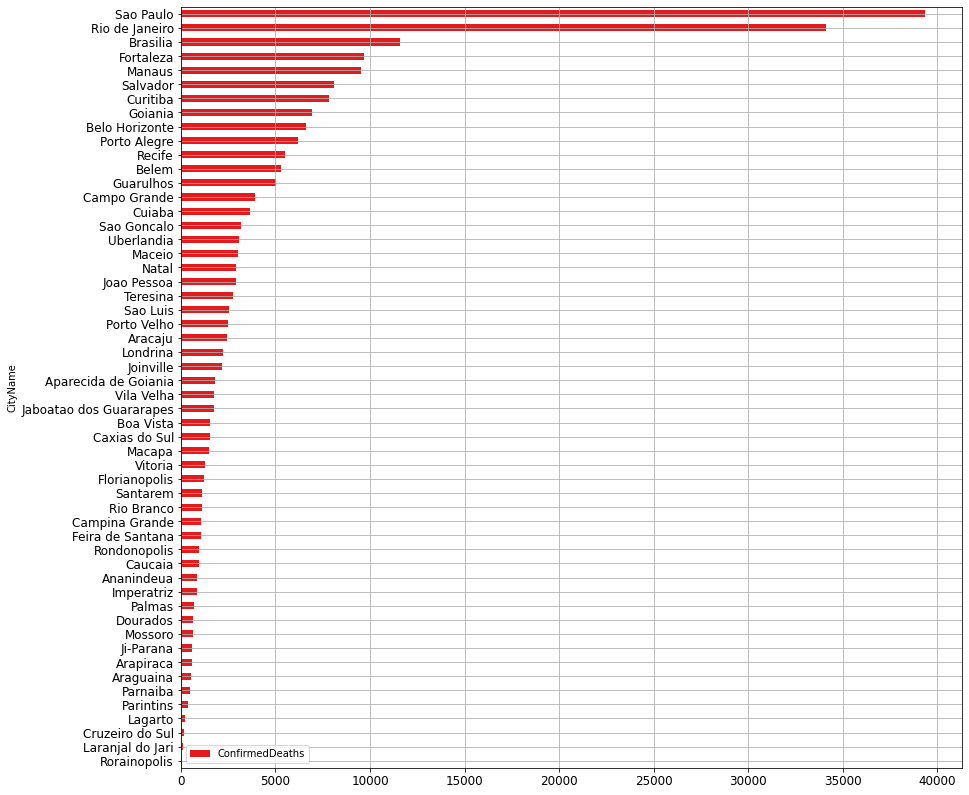

In [15]:
deathpercity = df.groupby(['CityName'])['ConfirmedDeaths'].agg('max').reset_index().set_index(['CityName'])

print(deathpercity[deathpercity.index == 'Sao Paulo'])

#deathpercity.plot.barh(figsize=(10,14),  logx=False)
deathpercity.sort_values('ConfirmedDeaths').plot(kind='barh', colormap='Set1', figsize=(14,14), fontsize=12, grid=True)

In [7]:
deathpercity

,ConfirmedDeaths
CityName,
Ananindeua,849.0
Aparecida de Goiania,1780.0
Aracaju,2435.0
Araguaina,550.0
Arapiraca,560.0
Belem,5282.0
Belo Horizonte,6636.0
Boa Vista,1547.0
Brasilia,11573.0


In [8]:
df[df.CityName == 'Sao Paulo'].loc[:, 'ConfirmedDeaths'].max()

39352.0

In [9]:
faixa_df = pd.read_csv('../data/faixas_niveis_2020.csv')

faixa_mun = faixa_df.dropna(how='any',axis=0, subset=['CodMun'])
faixa_mun.loc[:,'CodEst'] = faixa_mun['CodEst'].apply(np.int64)

codmunest = pd.read_csv('../data/codmunest.csv')

for e in codmunest.values:
    faixa_mun.loc[faixa_mun['CodEst'] == e[2], 'NomeDoEstado'] = e[3]
    faixa_mun.loc[faixa_mun['CodMun'] == int(e[0]/10), 'NomeDoMunicipio'] = e[1]
    faixa_mun.loc[faixa_mun['CodMun'] == int(e[0]/10), 'CodMun'] = 'BR_' + str(e[0])

faixa_mun.drop(columns=['nivel'], inplace=True)

faixa_mun.to_csv('../data/faixa_etaria_municipio.csv', index=False)
        


/tmp/ipykernel_40151/3160573360.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faixa_mun.loc[:,'CodEst'] = faixa_mun['CodEst'].apply(np.int64)
/tmp/ipykernel_40151/3160573360.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faixa_mun.loc[faixa_mun['CodEst'] == e[2], 'NomeDoEstado'] = e[3]
/tmp/ipykernel_40151/3160573360.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc